In [11]:
import os
import shutil
import datetime
from PIL import Image
import matplotlib.pyplot as plt
import cv2
import numpy as np

PATH0 = os.getcwd()
numbers= ["ones","twos","threes","fours","fives","sixes","sevens","eights","nines","tens"]
number = {1:"one",2:"two",3:"three",4:"four",5:"five",6:"six",7:"seven",8:"eight",9:"nine",10:"10"}
startdate = datetime.date(2020,8,16)
print(PATH0)
with open("last checked.txt") as f:
    lastchecked = f.read()
    print(lastchecked)

C:\Users\Stijn\Code\todays number
246


In [69]:
#exceptions
todaysnumbers=np.load('todaysnumbers.npy',allow_pickle=True).item()
todaysnumbers[0]=8
todaysnumbers[2]=9
todaysnumbers[30]=9
todaysnumbers[51]=6
todaysnumbers[6]=9
todaysnumbers[99]=9
np.save('todaysnumbers', todaysnumbers)

In [55]:
for n in numbers:
    os.mkdir(PATH0+"\\"+n)
    os.mkdir(PATH0+"\\"+n+"\\frames")

In [12]:
def date2number(file):
    date_name = [int(i) for i in file.split(' ')[-1].split('-')[0].split('_')]
    date = datetime.date(date_name[2]+2000,date_name[0],date_name[1])
    return str((date - startdate).days)

def downloadnewvids():
    with open("last checked.txt") as f:
        lastchecked = f.read()
    os.system('newvid.bat '+lastchecked)
    for file in os.listdir(PATH0+"\\vids"):
        if int(date2number(file))+1 > int(lastchecked):
            lastchecked = str(int(date2number(file))+1)
    with open("last checked.txt","w") as f:
        f.write(lastchecked)

def findframes():
    for file in os.listdir(PATH0+"\\vids"):
        print(file)
        count = 900
        if date2number(file)+"_frame.jpg" not in os.listdir(PATH0+"\\frames"):
            vidcap = cv2.VideoCapture(PATH0 + '\\vids\\' + file)
            vidcap.set(cv2.CAP_PROP_POS_FRAMES,count)
            success,image = vidcap.read()
            color = image.mean()
            while success:
                if color > 10 and image.mean() < 1:
                    breakpoint = count - 5
                    vidcap.set(cv2.CAP_PROP_POS_FRAMES,breakpoint)
                    success, image = vidcap.read()
                    print(PATH0 + '\\frames\\' + date2number(file) +"_frame.jpg")
                    cv2.imwrite(PATH0 + '\\frames\\' + date2number(file) +"_frame.jpg", image)
                    break 
                color = image.mean()
                success, image = vidcap.read()
                count += 1
            
def findnumbers():
    todaysnumbers=np.load('todaysnumbers.npy',allow_pickle=True).item()
    for file in os.listdir(PATH0+"\\subs"):
        with open(PATH0+"\\subs\\"+file) as f:
            subs = f.read()[-200:-100]
            found = False
            for i in range(1,10):
                n = number[i]
                if subs.find(n) != -1:
                    todaysnumber = i
                    found = True
            if found == False:
                todaysnumber = 10
        todaysnumbers[int(date2number(file))]=todaysnumber
    np.save('todaysnumbers', todaysnumbers)
    
def moveframes():
    todaysnumbers=np.load('todaysnumbers.npy',allow_pickle=True).item()
    for file in os.listdir(PATH0+"\\frames"):
        daynumb = int(file.split('_')[0])
        todaysnumber = todaysnumbers[daynumb]
        shutil.move(PATH0+"\\frames\\"+file, PATH0+"\\"+numbers[todaysnumber-1]+"\\frames\\"+file)

In [4]:
downloadnewvids()
findframes()
findnumbers()
moveframes()
os.system('cleanup.bat')

0

In [15]:
l=[8, 3, 9, 5, 1, 2, 9, 10, 8, 8, 1, 9, 9, 8, 5, 1, 10, 5, 9, 6, 4, 10, 3, 10, 9, 8, 4, 8, 8, 9, 9, 1, 5, 9, 8, 4, 1, 8, 6, 7, 8, 5, 6, 10, 9, 1, 1, 5, 6, 2, 8, 6, 5, 2, 5, 4, 10, 10, 2, 2, 4, 9, 6, 9, 9, 6, 10, 9, 10, 8, 1, 10, 5, 8, 6, 8, 10, 4, 10, 9, 10, 7, 4, 7, 8, 6, 7, 3, 10, 3, 8, 3, 3, 6, 7, 2, 6, 9, 5, 9, 10, 6, 7, 10, 8, 5, 8, 1, 6, 8, 3, 7, 8, 5, 1, 9, 3, 2, 6, 7, 8, 3, 9, 1, 10, 1, 8, 4, 4, 9, 2, 6, 7, 10, 7, 8, 3, 9, 7, 3, 6, 10, 5, 1, 6, 10, 7, 8, 10, 5, 6, 8, 6, 9, 10, 2, 4, 9, 4, 3, 4, 10, 6, 6, 1, 7, 10, 3, 1, 6, 3, 6, 9, 7, 9, 7, 9, 6, 5, 10, 8, 7, 5, 9, 8, 5, 5, 4, 7, 7, 4, 6]
t=datetime.date(2020,8,17)
dates = []
for x in l:
    if x == 6:
        print(t)
        dates.append(str(t.month) + '_' + str(t.day) + '_' + str(t.year)[2:])
    t=t+datetime.timedelta(days=1)

2020-09-05
2020-09-24
2020-09-28
2020-10-04
2020-10-07
2020-10-18
2020-10-21
2020-10-30
2020-11-10
2020-11-18
2020-11-21
2020-11-26
2020-12-03
2020-12-13
2020-12-26
2021-01-04
2021-01-08
2021-01-14
2021-01-16
2021-01-26
2021-01-27
2021-02-02
2021-02-04
2021-02-10
2021-02-24


In [18]:
lengths = []
for file in os.listdir(PATH+"\\vids"):
    vidcap = cv2.VideoCapture(PATH + '\\vids\\' + file)
    length = int(vidcap.get(cv2.CAP_PROP_FRAME_COUNT))
    lengths.append(length)

In [12]:
for n in numbers:
    PATH = PATH0+"\\"+n
    print(n)
    i = 1
    for file in os.listdir(PATH+"\\vids"):
        print(file)
        count = 900
        vidcap = cv2.VideoCapture(PATH + '\\vids\\' + file)
        vidcap.set(cv2.CAP_PROP_POS_FRAMES,count)
        success,image = vidcap.read()
        color = image.mean()
        while success:
            if color > 10 and image.mean() < 1:
                breakpoint = count - 5
                vidcap.set(cv2.CAP_PROP_POS_FRAMES,breakpoint)
                success, image = vidcap.read()
                cv2.imwrite(PATH + '\\frames\\' + file.split(' ')[-1][:-15]+ "frame%d.jpg" % breakpoint, image)
                break 
            color = image.mean()
            success, image = vidcap.read()
            count += 1
        i += 1
    print(i)

ones


FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\Stijn\\Code\\todays number\\ones\\vids'

In [24]:
# for file in os.listdir(PATH0+"\\vids"):
#     date_name = [int(i) for i in file.split(' ')[-1].split('-')[0].split('_')]
#     time_edit = os.path.getmtime(PATH0+"\\vids\\"+file)
#     date_file = datetime.date.fromtimestamp(time_edit)
#     if date_file.month == date_name[0] and date_file.day == date_name[1] and date_file.year -2000 == date_name[2]:
#         print(" ")
        
#     else:
#         print("ohno")
#         print(datetime.date.fromtimestamp(time_edit))
#         print(file.split(' ')[-1].split('-')[0].split('_'))
def date2number(file):
    date_name = [int(i) for i in file.split(' ')[-1].split('-')[0].split('_')]
    date = datetime.date(date_name[2]+2000,date_name[0],date_name[1])
#     print((date - startdate).days)
    return str((date - startdate).days)

def findframes():
    for file in os.listdir(PATH0+"\\vids"):
        print(file)
        count = 900
        if date2number(file)+"_frame.jpg" not in os.listdir(PATH0+"\\frames"):
            vidcap = cv2.VideoCapture(PATH0 + '\\vids\\' + file)
            vidcap.set(cv2.CAP_PROP_POS_FRAMES,count)
            success,image = vidcap.read()
            color = image.mean()
            while success:
                if color > 10 and image.mean() < 1:
                    breakpoint = count - 5
                    vidcap.set(cv2.CAP_PROP_POS_FRAMES,breakpoint)
                    success, image = vidcap.read()
                    print(PATH0 + '\\frames\\' + date2number(file) +"_frame.jpg")
                    cv2.imwrite(PATH0 + '\\frames\\' + date2number(file) +"_frame.jpg", image)
                    break 
                color = image.mean()
                success, image = vidcap.read()
                count += 1
            i += 1

TODAY'S NUMBER IS  9_13_20-sK7-zPvY9_Y.mkv
TODAY'S NUMBER IS...   1_20_21-uOJvUNc17ZA.mp4
TODAY'S NUMBER IS...   1_28_21--fkrW5j04XI.mp4
TODAY'S NUMBER IS...   3_23_21-xRAm7SuqENE.mp4
TODAY'S NUMBER IS...   3_25_21-E0-HBJeOkWE.mp4
TODAY'S NUMBER IS...  10_10_20-xtcHGYixvr4.mkv
TODAY'S NUMBER IS...  10_11_20-2507fr7w5ME.mkv
TODAY'S NUMBER IS...  10_13_20-cNorjcXdSSw.mkv
TODAY'S NUMBER IS...  10_15_20-sVM1Ga4GosI.mp4
TODAY'S NUMBER IS...  10_16_20-hUDh4E8OFIQ.mkv
TODAY'S NUMBER IS...  10_18_20-KrL2yCZLt3k.mkv
TODAY'S NUMBER IS...  10_19_20-Fg3QIryu2nk.mkv
TODAY'S NUMBER IS...  10_1_20-aLNpXSphBBc.mkv
TODAY'S NUMBER IS...  10_21_20-dOuHzQruSHo.mkv
TODAY'S NUMBER IS...  10_22_20-tLk-jOn4104.mp4
TODAY'S NUMBER IS...  10_23_20-0HL1KWfjK6o.mp4
TODAY'S NUMBER IS...  10_24_20-o5Ad_C-RBIo.mp4
TODAY'S NUMBER IS...  10_25_20-0jmWtopFK00.mkv
TODAY'S NUMBER IS...  10_26_20--mZQhbxe-LM.mkv
TODAY'S NUMBER IS...  10_27_20-wGTwlLQ5OBU.mp4
TODAY'S NUMBER IS...  10_28_20-Xx1LKLZl9Ec.mp4
TODAY'S NUMBER IS.

C:\Users\Stijn\Code\todays number\frames\244_frame.jpg


NameError: name 'i' is not defined

In [27]:
def big_move(n):
    t=datetime.date(2020,8,17)
    dates = []
    for x in l:
        if x == n:
            print(t)
            dates.append(str(t.month) + '_' + str(t.day) + '_' + str(t.year)[2:])
        t=t+datetime.timedelta(days=1)
    for file in os.listdir(PATH):
        for date in dates:
            if date in file:
                shutil.move(PATH+"\\"+file, PATH+"\\"+numbers[n-1]+"\\vids\\"+file)
    
# PATH = PATH+"\\"+numbers[n]

In [13]:
print(date2number("TODAY'S NUMBER IS...  4_19_21-l7ierJVx4q8.en.vtt"))

246


In [8]:
n = 2
print(int(np.ceil(len(os.listdir(PATH0+"\\"+numbers[n-1]+"\\frames\\"))**(0.5))))
cols, rows = 5,5
# thumb_width = int(1920/max(cols,rows))
# thumb_height = int(1080/max(cols,rows))
# new_im= Image.new("RGB",(int(1920/max(cols,rows)*cols),int(1080/max(cols,rows)*rows)))
# ims = []
# x, y, i = 0, 0, 0
# for file in os.listdir(PATH0+"\\"+numbers[n-1]+"\\frames\\"):
#     im=Image.open(PATH0+"\\"+numbers[n-1]+"\\frames\\"+file)
#     ims.append(im.resize((thumb_width, thumb_height)))
# for col in range(cols):
#     for row in range(rows):
#         new_im.paste(ims[i], (x, y))
#         y+=thumb_height
#         i+=1
#     y=0
#     x+=thumb_width
# new_im.save(PATH0+"\\"+numbers[n-1]+"\\ten.jpg")

5


6.0 2


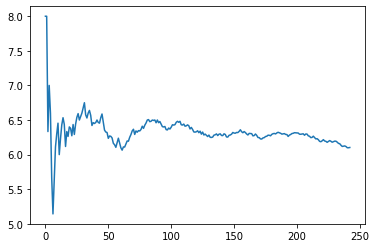

In [14]:
i=0
avg=0
averages = []
days = []
for n in l:
    avg=(i*avg+n)/(i+1)
    averages.append(avg)
    days.append(i)
    if avg<5.5:
        print(i,n)
    i+=1.
plt.plot(days, averages)

In [48]:
todaysnumbers={}
for file in os.listdir(PATH0+"\\subs"):
    seths_number = l[int(date2number(file))]
    with open(PATH0+"\\subs\\"+file) as f:
        subs = f.read()[-200:-100]
        found = False
        for i in range(1,10):
            n = number[i]
            if subs.find(n) != -1:
                todaysnumber = i
                if i != seths_number:
                    print(i, n,seths_number,file,int(date2number(file)))
                found = True
        if found == False:
            todaysnumber = 10
        if found == False and 10 != seths_number:
            print(n,seths_number,file,int(date2number(file)))
    todaysnumbers[int(date2number(file))]=todaysnumber
np.save('todaysnumbers', todaysnumbers) 

# Load
read_dictionary = np.load('todaysnumbers.npy',allow_pickle=True).item()
print(read_dictionary[100],todaysnumbers[100])

1 one 6 TODAY'S NUMBER IS...  10_7_20-Ift8kx60uX0.en.vtt 51
nine 9 TODAY'S NUMBER IS...  9_16_20-rnoHh9Y6Bnc.en.vtt 30
nine 8 TODAY'S NUMBER IS... 8_17_20-W-3MP27IU-I.en.vtt 0
1 one 9 TODAY'S NUMBER IS... 8_19_20-MAwvq4MAMfw.en.vtt 2
10 10


In [53]:
for file in os.listdir(PATH0+"\\vids"):
    daynumb=int(date2number(file))
    insubs=False
    for file2 in os.listdir(PATH0+"\\subs"):
        daynumb2=int(date2number(file2))
        if daynumb == daynumb2:
            insubs=True
    if insubs==False:
        print(daynumb,l[daynumb])

99 9
6 9
